## Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

## Read and Clean Dataset

In [2]:
crowd_data = pd.read_csv('Social_Distancing__Parks_Crowds_Data.csv')
crowd_data.count()

encounter_timestamp    1855
park_area_id           1855
park_district          1855
park_borough           1855
patroncount            1855
in_playground          1855
action_taken           1855
amenity                1168
dtype: int64

In [3]:
crowd_data.dropna(inplace = True)
crowd_data.count()

encounter_timestamp    1168
park_area_id           1168
park_district          1168
park_borough           1168
patroncount            1168
in_playground          1168
action_taken           1168
amenity                1168
dtype: int64

In [4]:
crowd_data.head()

,encounter_timestamp,park_area_id,park_district,park_borough,patroncount,in_playground,action_taken,amenity
0,07/07/2020 02:33:23 PM,X179,X-02,Bronx,50,True,Approached the crowd; they ignored the employee,Basketball court
1,07/05/2020 10:40:24 AM,B247,B-18,Brooklyn,50,False,Approached the crowd; they ignored the employee,Baseball field
2,07/04/2020 12:56:31 PM,B247,B-18,Brooklyn,20,False,Approached the crowd; they ignored the employee,Bench/sitting area
3,07/03/2020 10:16:52 PM,Q377,Q-06,Queens,75,False,Did not approach the crowd; the crowd remains,Soccer field
4,07/02/2020 03:11:30 PM,B018,B-18,Brooklyn,75,False,Approached the crowd; they ignored the employee,Open field/multi-purpose play area


In [5]:
# Decided NOT to split into date and time columns to be able to cast datetime data type

#date_time = crowd_data["encounter_timestamp"].str.split(" ", n=1, expand = True)
#crowd_data["date"]=date_time[0]
#crowd_data["time"]=date_time[1]
#crowd_data.drop(columns=["encounter_timestamp"], inplace=True)

crowd_data['encounter_timestamp'] = pd.to_datetime(crowd_data['encounter_timestamp'])
crowd_data.dtypes

encounter_timestamp    datetime64[ns]
park_area_id                   object
park_district                  object
park_borough                   object
patroncount                     int64
in_playground                    bool
action_taken                   object
amenity                        object
dtype: object

In [6]:
# Split into action and response

new_action = crowd_data["action_taken"].str.split("; ", n=1, expand = True)
crowd_data["action"]=new_action[0]
crowd_data["response"]=new_action[1]
crowd_data.drop(columns=["action_taken"], inplace=True)

In [7]:
# Rename response options for easier understanding

crowd_data = crowd_data.replace({'they ignored the employee': 'Ignored employee'}, regex=True)
crowd_data = crowd_data.replace({'the crowd remains': 'Crowd remains'}, regex=True)
crowd_data = crowd_data.replace({'they complied with instructions': 'Complied with instructions'}, regex=True)
crowd_data

#crowd_data.to_csv('crowd_data_clean.csv')

,encounter_timestamp,park_area_id,park_district,park_borough,patroncount,in_playground,amenity,action,response
0,2020-07-07 14:33:23,X179,X-02,Bronx,50,True,Basketball court,Approached the crowd,Ignored employee
1,2020-07-05 10:40:24,B247,B-18,Brooklyn,50,False,Baseball field,Approached the crowd,Ignored employee
2,2020-07-04 12:56:31,B247,B-18,Brooklyn,20,False,Bench/sitting area,Approached the crowd,Ignored employee
3,2020-07-03 22:16:52,Q377,Q-06,Queens,75,False,Soccer field,Did not approach the crowd,Crowd remains
4,2020-07-02 15:11:30,B018,B-18,Brooklyn,75,False,Open field/multi-purpose play area,Approached the crowd,Ignored employee
...,...,...,...,...,...,...,...,...,...
1850,2020-07-14 11:08:32,B329-01,B-18,Brooklyn,100,True,Playground,Approached the crowd,Ignored employee
1851,2020-07-14 11:00:53,B016,B-04,Brooklyn,25,False,Open field/multi-purpose play area,Did not approach the crowd,Crowd remains
1852,2020-07-14 10:00:38,B529,B-01,Brooklyn,15,False,Open field/multi-purpose play area,Did not approach the crowd,Crowd remains
1853,2020-07-15 13:23:32,M029-01,M-12,Manhattan,15,True,Adult fitness equipment,Did not approach the crowd,Crowd remains


## Q1 - Which boroughs and amenities experience the most overcrowding?

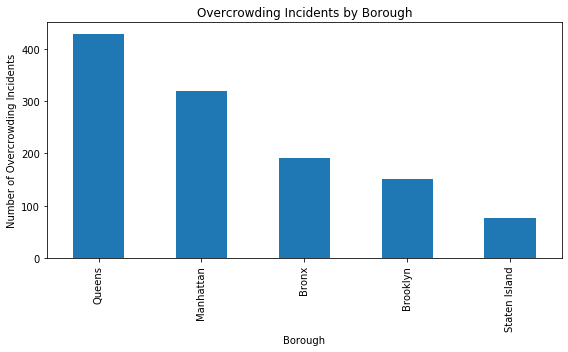

In [49]:
#Q1 - WHICH BOROUGHS ARE MOST LIKELY TO EXPERIENCE OVERCROWDING?

borough_group = crowd_data.groupby('park_borough')
count_boroughs = borough_group['park_borough'].count()
count_boroughs = count_boroughs.sort_values(ascending=False)
count_chart = count_boroughs.plot(kind='bar')
count_chart.set_xlabel("Borough")
count_chart.set_ylabel("Number of Overcrowding Incidents")
count_chart.set_title("Overcrowding Incidents by Borough")

plt.rcParams["figure.figsize"]=(8,5)

plt.tight_layout()

plt.savefig("Images/Q1_Overcrowding_by_Borough.png")

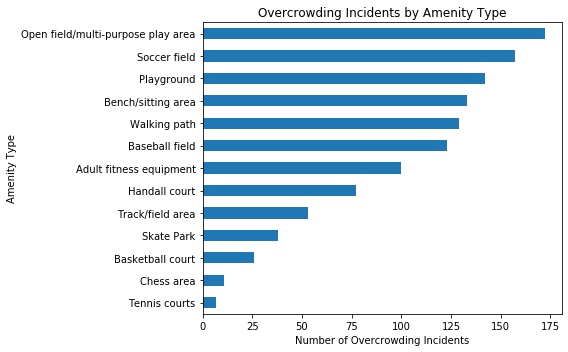

In [47]:
#Q1 - WHICH AMENITIES ARE MOST LIKELY TO ATTRACT OVERCROWDING?

open_area = ['lightslategray',]
indv_sports = 'crimson'

amenity_group = crowd_data.groupby('amenity')
count_amenity = amenity_group['amenity'].count()
count_amenity = count_amenity.sort_values()
amenity_chart = count_amenity.plot(kind='barh')
amenity_chart.set_xlabel("Number of Overcrowding Incidents")
amenity_chart.set_ylabel("Amenity Type")
amenity_chart.set_title("Overcrowding Incidents by Amenity Type")

plt.rcParams["figure.figsize"]=(8,5)

plt.tight_layout()

plt.savefig("Images/Q1_Overcrowding_by_Amenity.png")

## Q2 - How effective are patrol officers?

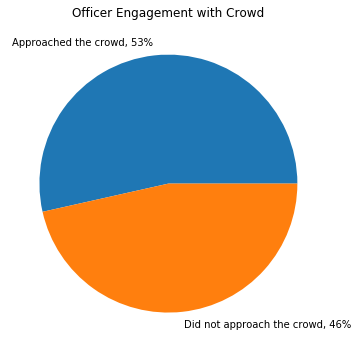

In [53]:
action_labels = 'Approached the crowd, 53%', 'Did not approach the crowd, 46%'
actions_group = crowd_data.groupby('action')
action_count = actions_group['action'].count()

#actions_group.describe()
#action_count.count

fig1, ax1 = plt.subplots()
ax1.pie(action_count, labels=action_labels)
plt.title("Officer Engagement with Crowd")

plt.tight_layout()

plt.savefig("Images/Q2_Action.png")

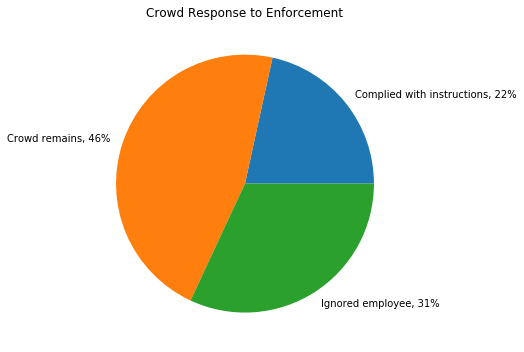

In [54]:
response_labels = 'Complied with instructions, 22%', 'Crowd remains, 46%', 'Ignored employee, 31%'
response_group = crowd_data.groupby('response')
response_count = response_group['response'].count()

#response_group.describe()
#response_count.count

fig2, ax2 = plt.subplots()
ax2.pie(response_count, labels=response_labels)
plt.title("Crowd Response to Enforcement")

plt.tight_layout()

plt.savefig("Images/Q2_Response.png")

## Q3 - How have outdoor social events evolved over time?

In [12]:
timeseries = crowd_data[['encounter_timestamp', 'park_borough']]
timeseries['Tdates'] = timeseries['encounter_timestamp'].map(lambda x: x.strftime('%m/%d/%Y'))

dates = timeseries['Tdates'].keys()

idx = pd.date_range('04-01-2020', '07-24-2020')

manhattan = timeseries[timeseries['park_borough'].isin(['Manhattan'])]
manhattan = manhattan.groupby('Tdates').size()
manhattan.index = pd.DatetimeIndex(manhattan.index)
manhattan = manhattan.reindex(idx, fill_value=0)


queens = timeseries[timeseries['park_borough'].isin(['Queens'])]
queens = queens.groupby('Tdates').size()
queens.index = pd.DatetimeIndex(queens.index)
queens = queens.reindex(idx, fill_value=0)

bronx = timeseries[timeseries['park_borough'].isin(['Bronx'])]
bronx = bronx.groupby('Tdates').size()
bronx.index = pd.DatetimeIndex(bronx.index)
bronx = bronx.reindex(idx, fill_value=0)

brooklyn = timeseries[timeseries['park_borough'].isin(['Brooklyn'])]
brooklyn = brooklyn.groupby('Tdates').size()
brooklyn.index = pd.DatetimeIndex(brooklyn.index)
brooklyn = brooklyn.reindex(idx, fill_value=0)

statenisland = timeseries[timeseries['park_borough'].isin(['Staten Island'])]
statenisland = statenisland.groupby('Tdates').size()
statenisland.index = pd.DatetimeIndex(statenisland.index)
statenisland = statenisland.reindex(idx, fill_value=0)


C:\Users\kirst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


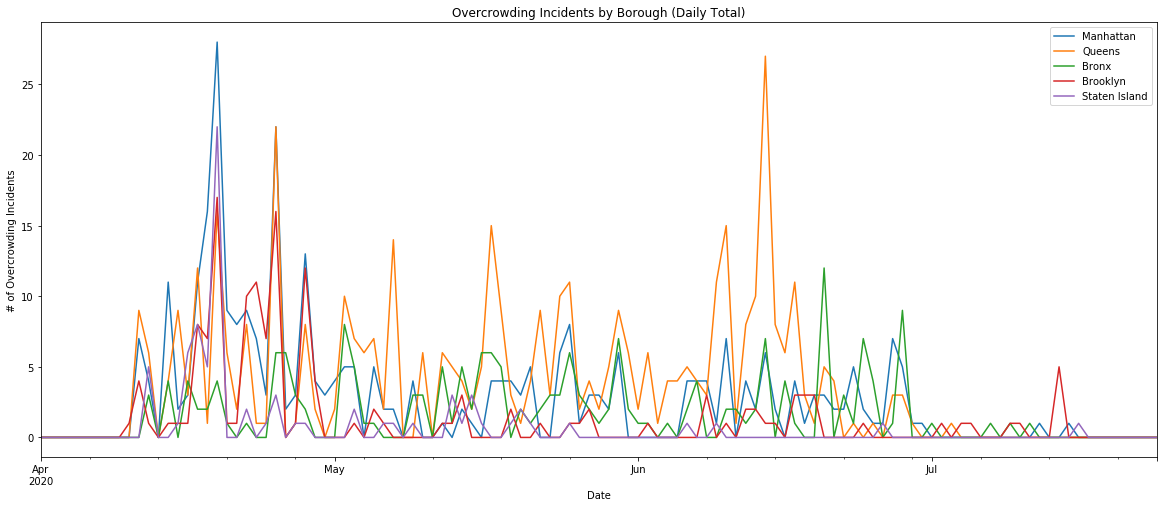

In [14]:
manhattan.plot(label="Manhattan")
queens.plot(label="Queens")
bronx.plot(label="Bronx")
brooklyn.plot(label="Brooklyn")
statenisland.plot(label="Staten Island")
plt.legend()
plt.title("Overcrowding Incidents by Borough (Daily Total)")
plt.xlabel("Date")
plt.ylabel("# of Overcrowding Incidents")
plt.rcParams["figure.figsize"]=(20,8)

plt.savefig("Images/Q3_Incidents_Timeline.png")

plt.show()